# Group comparison

The group comparison was conducted to investigate three main research questions through different comparative axes:
- Non-converters vs. Converters
- Non-converters vs. Converters vs. First Episode Psychosis
- Non-converters vs. Converters vs. Schizophrenia vs. Bipolar Disorder  

These axes were selected to address the following questions:
- Are significant differences present between converters and non-converters?
- If significant differences exist, how do converters compare to individuals at the next stage of disease development, specifically those experiencing their first episode of psychosis (FEP)?
- Within the FEP group, are significant differences observed between patients with schizophrenia and those with bipolar disorder?

In [1]:
# Import libraries
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

# set seaborn style
sns.set_style('whitegrid')

In [2]:
# Load data
df = pd.read_csv('../results/uncertain_merged_all_cnv_annotations_filtered_per_ind_with_clinical.csv')

# Remove outliers with ID S36958 and S36981
df = df[df['ID'] != 'S36958']
df = df[df['ID'] != 'S36981']

In [3]:
# Define constants
DESCRIPTORS = [
    'NB_rare_DEL', 'NB_rare_DUP', 'Avg_copy_number_DEL', 'Avg_copy_number_DUP', 
    'Rare_length_DEL', 'Rare_length_DUP', 'NB_genes_rare_DEL', 'NB_genes_rare_DUP',
    'NB_brain_genes_rare_DEL', 'NB_brain_genes_rare_DUP', 'NB_brain_rare_DEL', 
    'NB_brain_rare_DUP', 'Brain_rare_length_DEL', 'Brain_rare_length_DUP',
    'NB_long_rare_DEL', 'NB_long_rare_DUP', 'Long_rare_length_DEL', 
    'Long_rare_length_DUP', 'NB_long_brain_rare_DEL', 'NB_long_brain_rare_DUP',
    'Long_brain_rare_length_DEL', 'Long_brain_rare_length_DUP'
]

NUM_PLOTS = len(DESCRIPTORS)
NUM_COLS = 2
NUM_ROWS = (NUM_PLOTS // NUM_COLS) + (NUM_PLOTS % NUM_COLS)

In [4]:
# Function to filter the DataFrame based on phenotypes
def filter_df(df, phenotypes, col_name="Phenotype_1"):
    df["Phenotype"] = df[col_name].apply(lambda x: x if x in phenotypes[:-1] else phenotypes[-1])
    return df[df["Phenotype"].isin(phenotypes)]

# Function to generate colors for plots
def get_colors(phenotypes):
    color_palette = ['#bfd1df', '#8fa6c1', '#4c719e', '#3d5180']
    return dict(zip(phenotypes, color_palette))

# Function to create plots
def create_plots(df, phenotypes, pairs):
    colors = get_colors(phenotypes)
    fig, ax = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(20, NUM_ROWS * 6))
    
    for i, desc in enumerate(DESCRIPTORS):
        sns.boxplot(x="Phenotype", y=desc, data=df, 
                    ax=ax[i // NUM_COLS, i % NUM_COLS], palette=colors, order=phenotypes)
        ax[i // NUM_COLS, i % NUM_COLS].set_title(f"{desc}")
        ax[i // NUM_COLS, i % NUM_COLS].set_xlabel("")
        
        for tick in ax[i // NUM_COLS, i % NUM_COLS].get_xticklabels():
            tick.set_rotation(45)
        
        annotator = Annotator(
            x="Phenotype", y=desc, data=df, 
            ax=ax[i // NUM_COLS, i % NUM_COLS],
            pairs=pairs
        )
        annotator.configure(
            test='Mann-Whitney', text_format='full', 
            line_height=0.05, text_offset=8,
            hide_non_significant=True, 
            comparisons_correction="BH", 
            loc='inside', verbose=False
        )
        annotator.apply_and_annotate()
    
    filename = "_".join(phenotypes)
    plt.savefig(f"../graphs/{filename}.png")
    plt.tight_layout()
    plt.show()

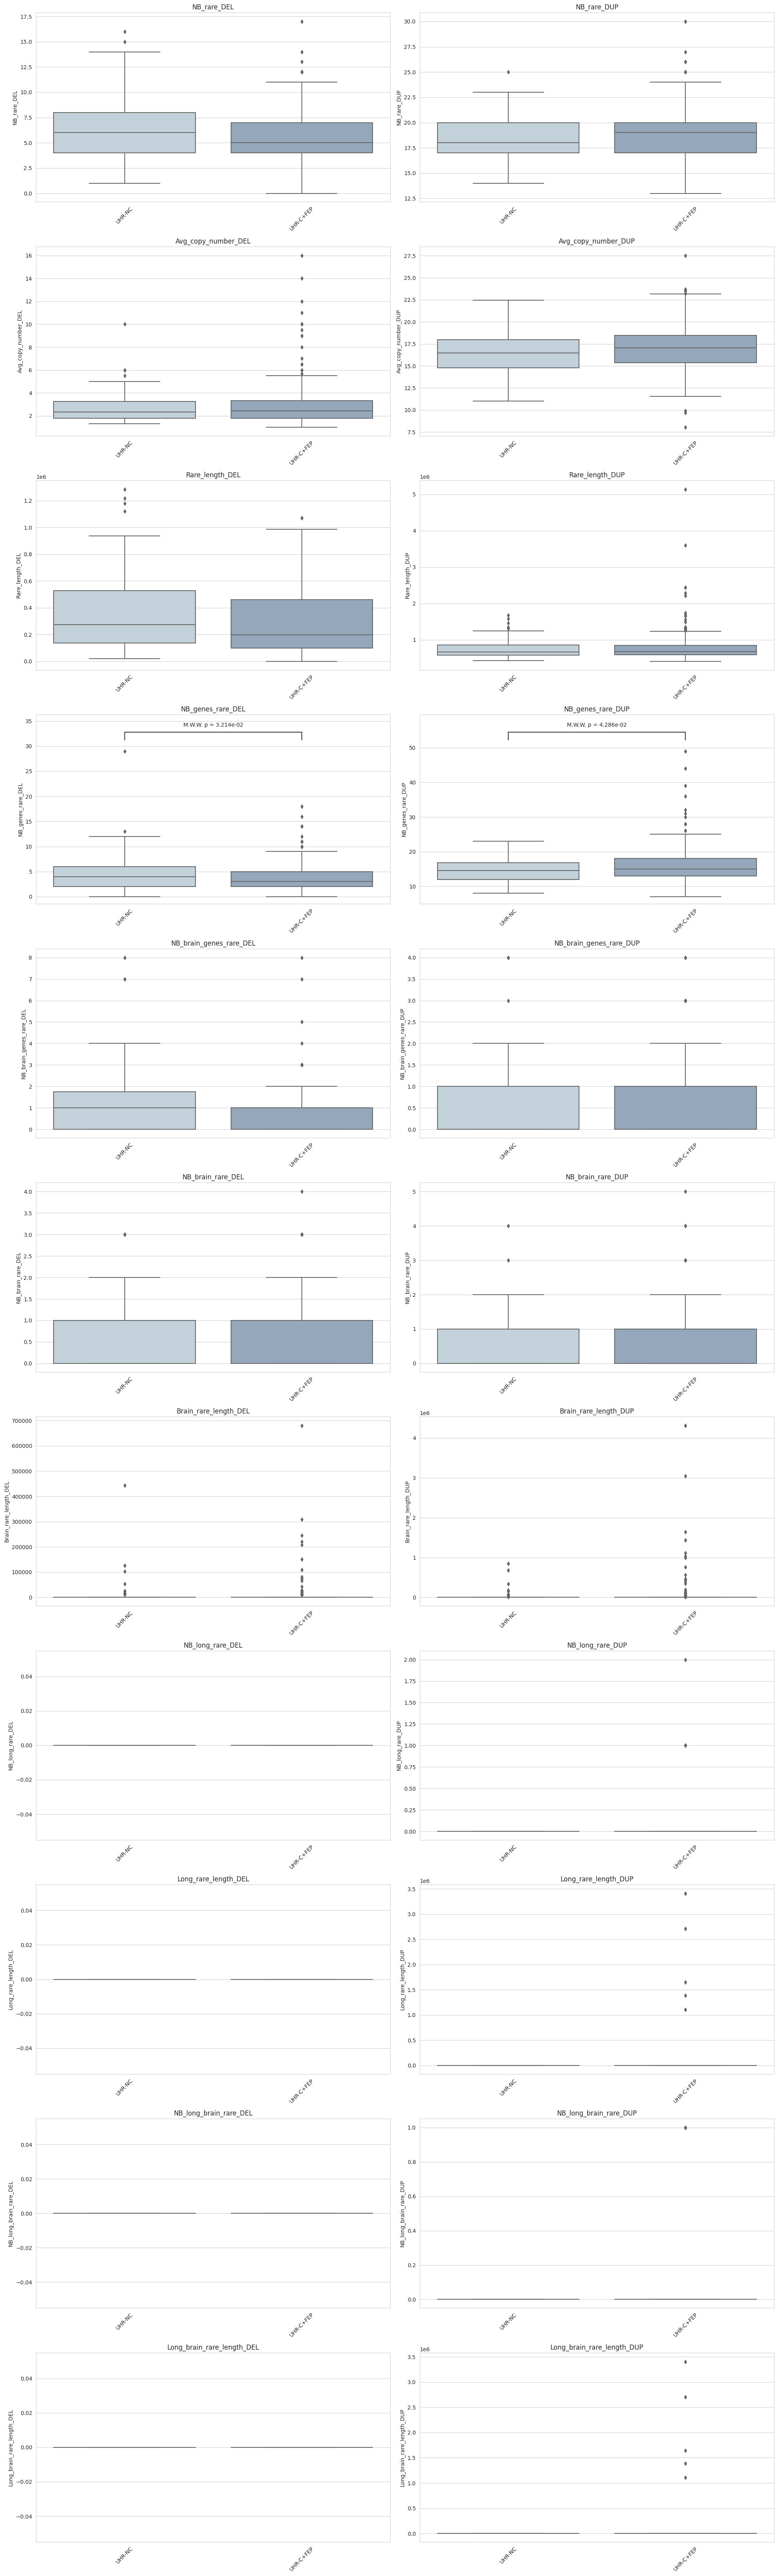

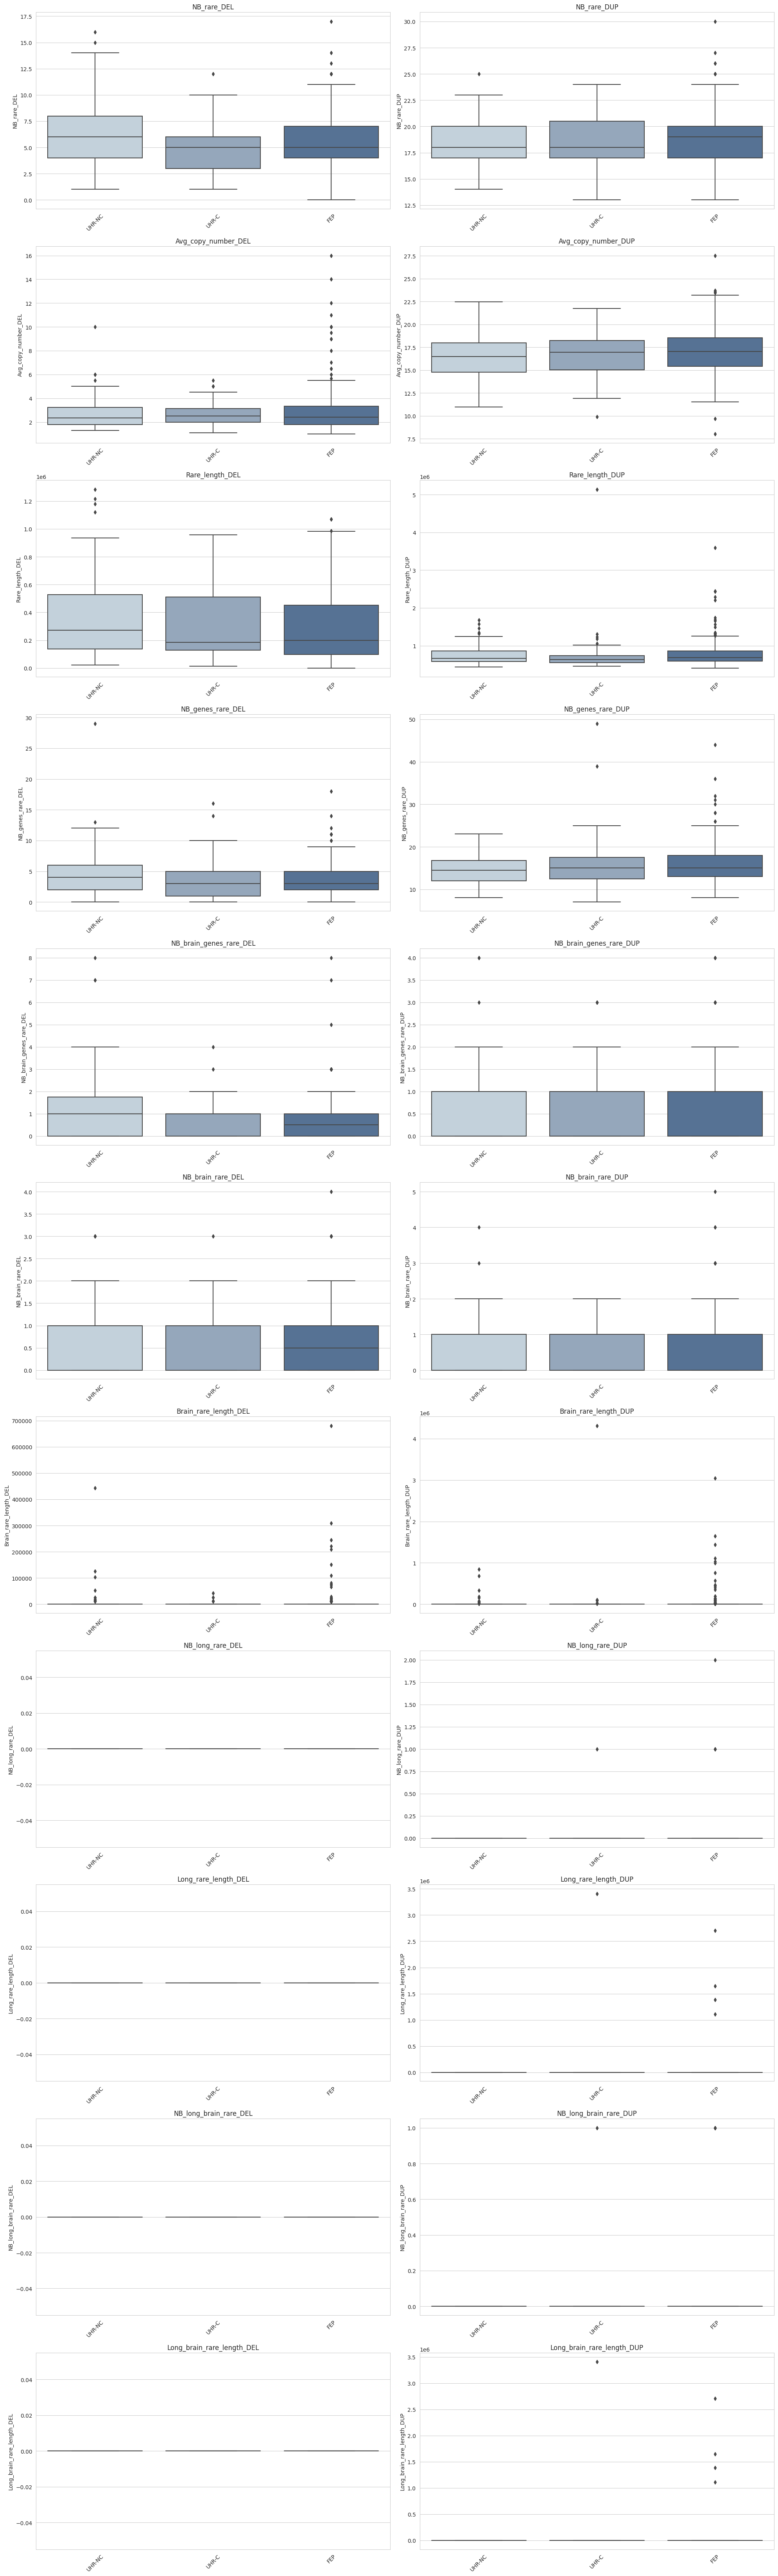

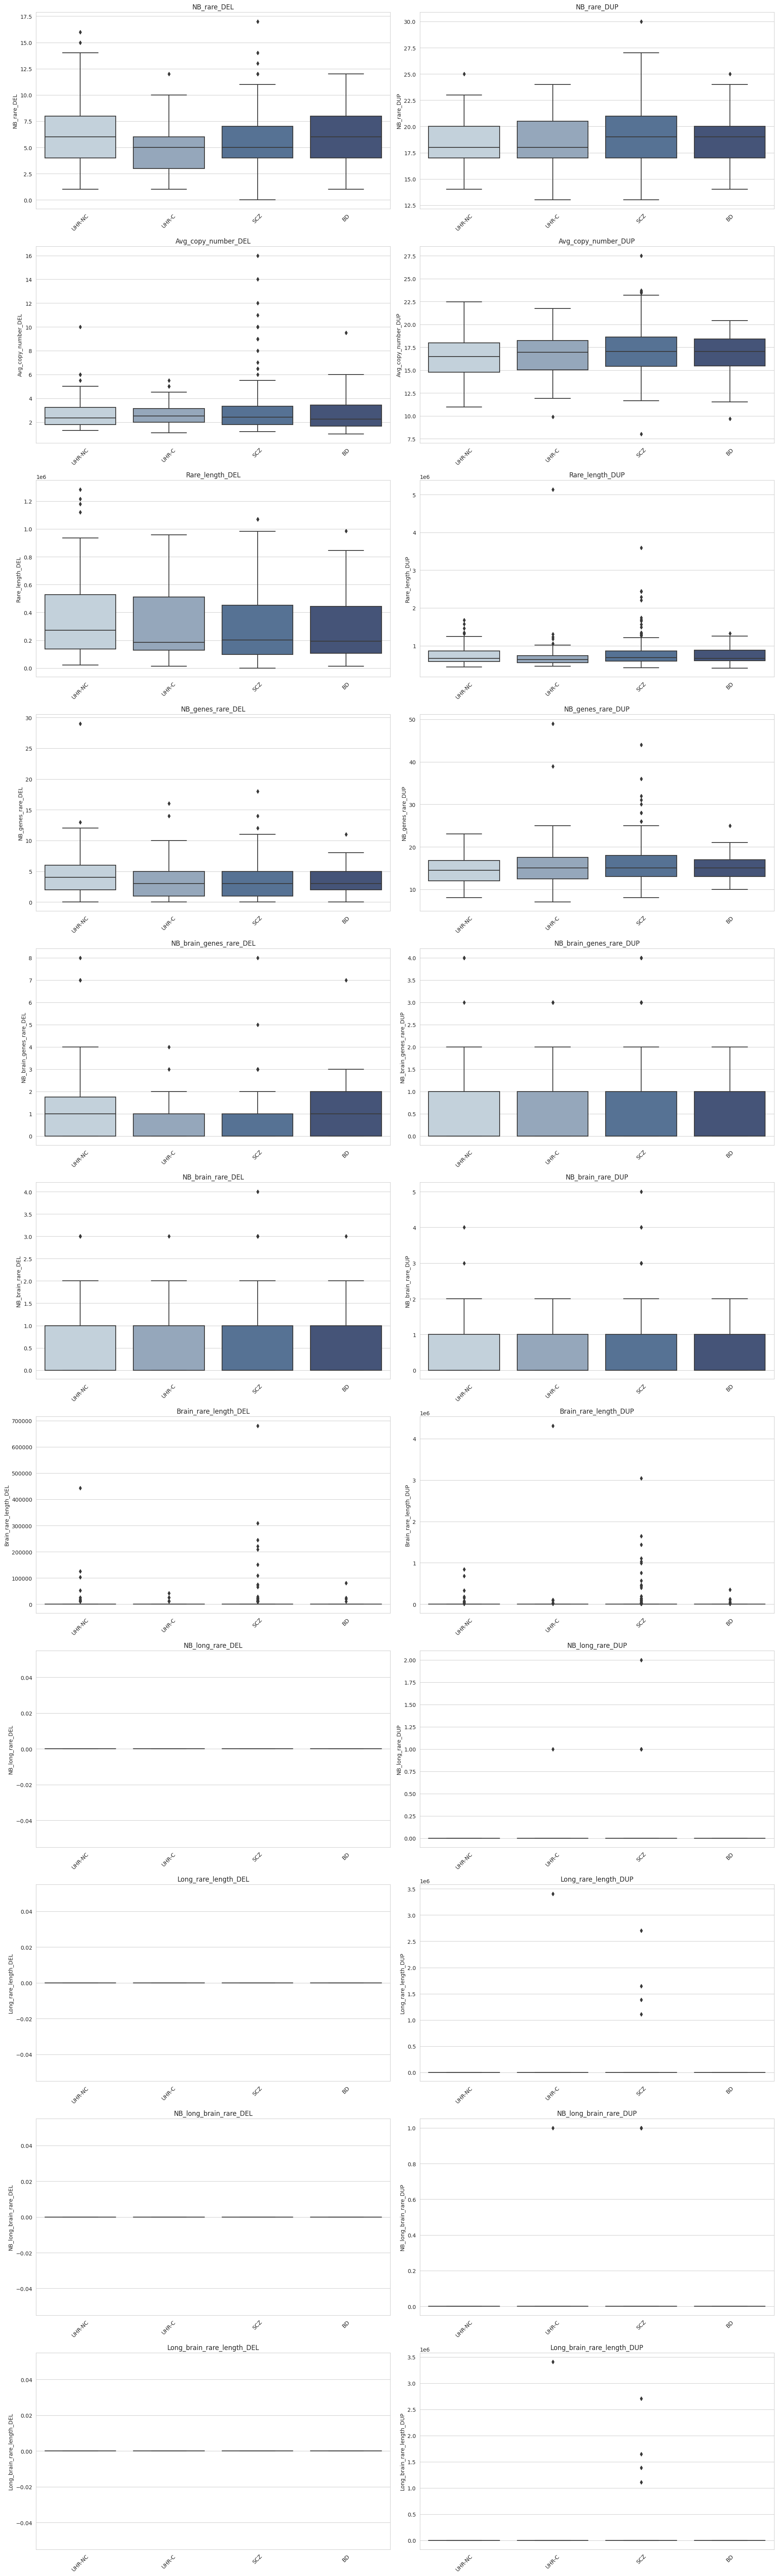

In [5]:
# Non-converters vs. Converters
phenotypes = ["UHR-NC", "UHR-C+FEP"]
df_filtered = filter_df(df, phenotypes)
pairs = [("UHR-NC", "UHR-C+FEP")]
create_plots(df_filtered, phenotypes, pairs)

# Non-converters vs. Converters vs. First Episode Psychosis
phenotypes = ["UHR-NC", "UHR-C", "FEP"]
df_filtered = filter_df(df, phenotypes)
pairs = [("UHR-NC", "UHR-C"), ("UHR-NC", "FEP"), ("UHR-C", "FEP")]
create_plots(df_filtered, phenotypes, pairs)

# Non-converters vs. Converters vs. Schizophrenia vs. Bipolar Disorder
phenotypes = ["UHR-NC", "UHR-C", "SCZ", "BD"]
df_filtered = filter_df(df, phenotypes)
pairs = [
    ("UHR-NC", "UHR-C"), ("UHR-NC", "SCZ"), 
    ("UHR-NC", "BD"), ("UHR-C", "SCZ"), 
    ("UHR-C", "BD"), ("SCZ", "BD")
]
create_plots(df_filtered, phenotypes, pairs)

The group comparison, revealed significant differences (after correcting for multiple testing between groups) between converters and non-converters in terms of the number of protein-coding genes involved in rare deletions and duplications. Converters appear to have fewer genes implicated in rare deletions and more genes involved in rare duplications.

This result might suggest that duplications, which may lead to the overexpression of certain genes (e.g. dosage-sensitive genes), could play a role in the progression to psychosis by potentially altering normal cognitive and neural functioning. Conversely, non-converters having more genes implicated in deletions might indicate a protective mechanism, possibly by reducing the activity of genes that could otherwise predispose individuals to psychosis. However, the result was not significant after correcting for the number of tests conducted for each parameter, suggesting that it is likely an artifact.